# 실습 1

점 4개 생성

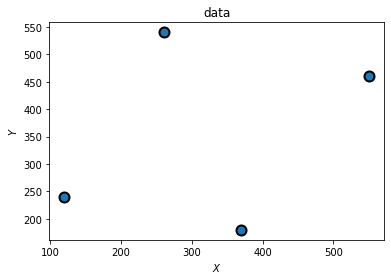

In [63]:
# from sklearn.datasets import make_classification
import numpy as np
import matplotlib .pyplot as plt

points = [(120,240), (370,180), (550,460), (260,540)]
points = np.array(points) # 이미지에 출력하기 위해 

plt.title("data")
plt.scatter(points[:, 0], points[:, 1], marker='o', s=100, edgecolor="k", linewidth=2)

plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.show()

# circumcircle 함수 구현

278.3093525179856 348.78896882493984 192.08563411316726


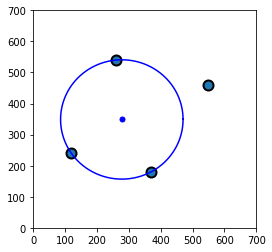

In [64]:
import math
triangle = [] # 분할 삼각형
center = [] # 외접원의 중심
radius = [] # 외접원의 반지름

# 3개의 점을 받아 외접원을 계산하는 함수
def circumcircle(pt1,pt2,pt3): #, display = True):
    # TODO 
    a1 = 2*(pt1[0]-pt2[0])
    b1 = 2*(pt1[1]-pt2[1])
    r1 = pt1[0]**2 - pt2[0]**2 + pt1[1]**2 - pt2[1]**2

    a2 = 2*(pt2[0]-pt3[0])
    b2 = 2*(pt2[1]-pt3[1])
    r2 = pt2[0]**2 - pt3[0]**2 + pt2[1]**2 - pt3[1]**2

    c_x = (b2*r1 - b1*r2)/(a1*b2 - a2*b1)
    c_y = (r1 - a1*c_x) / b1
    radius = ((pt1[0]-c_x)**2 + (pt1[1]-c_y)**2)**(1/2)
    return c_x,c_y,radius

c_x,c_y,radius = circumcircle(points[0],points[1],points[3])
print(c_x,c_y,radius)


# if display:
plt.figure( figsize=(4,4) )
plt.scatter(points[:, 0], points[:, 1], marker='o', s=100, edgecolor="k", linewidth=2)

M = 1000
angle = np.exp(1j * 2 * np.pi / M)
angles = np.cumprod(np.ones(M + 1) * angle)
x, y = c_x +  radius * np.real(angles), c_y + radius * np.imag(angles)
plt.plot( x, y, c='b')
plt.scatter( [c_x], [c_y], s=25, c= 'b')
plt.xlim( [ 0, 700] )
plt.ylim( [ 0, 700] )
plt.show()

In [65]:
points = [(120,240), (370,180), (550,460), (260,540)]

# 입력으로 들어온 점이 외접원 내에 있는지 체크하는 함수
def isInCircumcircle(pts, _pt):
    t_x, t_y, t_r = circumcircle(pts[0], pts[1], pts[2])
    if (t_x-_pt[0])**2 + (t_y-_pt[1])**2 < t_r**2:
      return True
    else:
      return False


def display( ):
    plt.figure( figsize=(8,4) )
    plt.subplot( 1, 2, 1)
    X, Y = [], []

    for pt in points:
        X.append( pt[0] )
        Y.append( pt[1] )

    plt.scatter(  X, Y, c='r', s=25)
    plt.subplot( 1, 2, 2)

    for i in range(len(triangle)):
        tri = triangle[i]
        print(tri[0])
        # T = self.mesh[key]
        plt.plot( [tri[0][0], tri[1][0]], [tri[0][1], tri[1][1]], 'g-', linewidth=1)
        plt.plot( [tri[1][0], tri[2][0]], [tri[1][1], tri[2][1]], 'g-', linewidth=1)
        plt.plot( [tri[2][0], tri[0][0]], [tri[2][1], tri[0][1]], 'g-', linewidth=1)
    plt.scatter(  X, Y, c='r', s=25)
    plt.show()

# 가능한 조합들을 체크함
def combinations(arr, n):
    result = []

    # TODO
    for i in range(0, 2**len(arr)):
      tmp = []
      for j in range(0, len(arr)):
        #print(i)
        if i&1:
          tmp.append(arr[j])
        i = i>>1
      if len(tmp)==n:
        result.append(tmp)
    return result
    


[[(120, 240), (370, 180), (550, 460)], [(120, 240), (370, 180), (260, 540)], [(120, 240), (550, 460), (260, 540)], [(370, 180), (550, 460), (260, 540)]]
4
(260, 540)
296.6089108910891 425.0371287128713 255.79180285622988
(550, 460)
278.3093525179856 348.78896882493984 192.08563411316726
(370, 180)
353.5947046843177 313.6558044806517 244.93195706204938
(120, 240)
371.10878661087867 377.14435146443515 197.1474694792738
triangle: [[(120, 240), (370, 180), (260, 540)], [(370, 180), (550, 460), (260, 540)]]
(120, 240)
(370, 180)


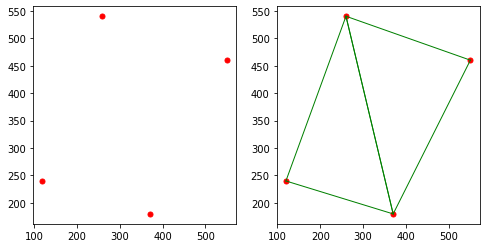

In [66]:
# main #
triangle = [] # 생성한 삼각형 저장

combination = combinations(points, 3) # 가능한 조합들을 체크함
print(combination)
print(len(combination))

for pts in combination:
    for i in range(len(points)):
        if points[i] not in pts:
            print(points[i])
            disinclude_pt = points[i]
        
    c_x, c_y, radius = circumcircle(pts[0], pts[1], pts[2]) # 외접원을 만들고
    print(c_x, c_y, radius)
    
    # 다른점이 생성된 외접원 내에 있는지 확인
    if not isInCircumcircle(pts, disinclude_pt): # 외접원 안에 없으면
        triangle.append(pts)# 다른 점이 외접원 내에 없다면 3개의 점을 삼각형으로 저장

print('triangle:',triangle)

display()

# 실습 2

In [67]:
#title This code cell defines the input data, generates and plots the delaunay triangulation.
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from PIL import *
import pandas as pd
import matplotlib.ticker as plticker
import seaborn as sns
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


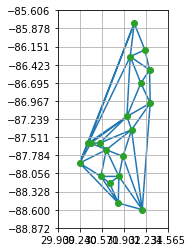

In [68]:
grid_size = [5, 13]
fig_size = (30, 15)


# A : [31.22, -86.2]
# B : [30.83, -88.1]


#@title This code cell defines the input data, generates and plots the delaunay triangulation.
from scipy.spatial import Delaunay
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from PIL import *
import pandas as pd
import matplotlib.ticker as plticker
import seaborn as sns
!pip install -U scikit-learn

# using the 19 points from Dr. Tzeng's email.
points = np.array([
[31.3, -87], [31.29, -86.5], [31.22, -86.2], [31.18, -88.6],
[31.16, -86.7], [31.06, -85.8], [31.02, -87.4], [31, -86.3], 
[30.95, -87.2], [30.89, -87.8], [30.83, -88.1], [30.82, -88.5], 
[30.69, -88.2], [30.64, -87.7], [30.56, -88.1], [30.54, -87.6], 
[30.41, -87.6], [30.37, -87.6], [30.24, -87.9]
])

values = np.array([5759, 1439, 18827, 20267, 7253, 15893, 2879, 11573, 17387, 
                   4319, 26243, 0, 24641, 21707, 23147, 10133, 8693, 13013, 14453])

norm = np.linalg.norm(values)
norm_values = values / norm

# add the values for each coordinate, and format the data
df = pd.DataFrame(data=points)
df.columns = ['X', 'Y']
df['val'] = values # from the excel sheet
df['norm_val'] = norm_values

#TODO 
x_range, y_range = 1.325, 3.266


tri = Delaunay(points, incremental=True)

# TODO #plot the triangulation
fig, ax = plt.subplots(1)
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')

# Add the grid
x_ticks = np.arange(df.X.min() - (x_range/(grid_size[0] - 1)), df.X.max() + (x_range/(grid_size[0] - 1)), (x_range/(grid_size[0] - 1)))
y_ticks = np.arange(df.Y.min() - (y_range/(grid_size[1] - 1)), df.Y.max() + (y_range/(grid_size[1] - 1)), (y_range/(grid_size[1] - 1)))
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_aspect('equal')
plt.grid()
plt.show()


# 실습 3

In [69]:
class Point:
	def __init__(self, x, y):
		self.x = x
		self.y = y

	def __str__(self): 
		return str((self.x, self.y))
	def __repr__(self):
		return (self.x, self.y)

class Line:
	def __init__(self, m, b):
		self.m = m
		self.b = b
def midpoint(p1, p2):
	m_p = ((p1[0] + p2[0])/2, (p1[1] + p2[1])/2)
	return m_p


def find_b(p, m):
	return p[1] - m * p[0]


def slope(p1, p2):

	# If the slope is vertical
	if p2[0] == p1[0]:
		return 'undefined'
	return (p2[1] - p1[1])/(p2[0] - p1[0])


def slope_perpendicular_bisector(p1, p2):
	# If the line is horizontal
	if p2[0] == p1[0]:
		return 0
	
	if p2[1] == p1[1]:
		return 'undefined'
		
	return -((p2[0] - p1[0])/(p2[1] - p1[1]))


def perpendicular_bisector(p1, p2, xmin, xmax, ymin, ymax):

	m = slope_perpendicular_bisector(p1, p2)
	m_p = midpoint(p1, p2)

	if m == 'undefined':
		p_r1 = (m_p[0], ymin-2 )
		p_r2 = (m_p[0], ymax+2 )
			
	elif m == 0:
		p_r1 = (xmin-2, m_p[1])
		p_r2 = (xmax+2, m_p[1])
	else:
		b = find_b(m_p, m)
		x_small = xmin - 2
		x_large = xmax + 2

		# Find points that the bisector intersect the rectangle
		# Add more cases
		y_r1 = m*(x_small - 1) + b
		p_r1 = (x_small - 1, y_r1)
		y_r2 = m*(x_large+1) + b
		p_r2 = (x_large + 1, y_r2)

	return p_r1, p_r2
	
def intersection(p1, q1, p2, q2, shift=None):
	m1 = slope(p1, q1)
	if shift:
		m1 -= shift
	m2 = slope(p2, q2)

	if m1 != 'undefined':
		b1 = find_b(p1, m1)
	if m2 != 'undefined':
		b2 = find_b(p2, m2)

	# If the line is vertical, we take the x of the point to be b
	if m1 == 'undefined' and m2 == 0:
		x = p1[0]
		y = p2[1]
	elif m2 == 'undefined' and m1 == 0:
		x = p2[0]
		y = p1[1]
	elif m1 == 'undefined':
		x = p1[0]
		y = m2*x+b2
	elif m2 == 'undefined':
		x = p2[0]
		y = m1*x+b1
	
	else:
		x = (b2-b1)/(m1-m2)
		y = m1*x+b1
	return (x, y)

if __name__ == '__main__':
	p1 = (7, -5)
	p2 = (-7, 5)

	print(slope(p1, p2))


-0.7142857142857143


In [70]:
import math as m


class Xygraph:
    """Represents a set of vertices connected by undirected edges.
    The vertices are stored in a list of coordinates, while
    the edges are stored as a pair of indices (i,j) of the vertices
    list.
    """

    def __init__(self, vl=[], el=[]):
        """Creates the 2D graph formed by a list of vertices (x,y)
        and a list of indices (i,j)
        """
        self.vl = vl
        self.el = el
        if self.vl != []:
            self.minmax()

    def minmax(self):
        """Determines the boundary box of the vertices in the graph"""
        vx = [v[0] for v in self.vl]
        vy = [v[1] for v in self.vl]
        self.xmax, self.xmin = max(vx), min(vx)
        self.ymax, self.ymin = max(vy), min(vy)

In [71]:
# Copyright 2008, Angel Yanguas-Gil
from math import sqrt
import math as m
import numpy as np
from itertools import permutations



class DcelError(Exception):
	pass


class Vertex:

	def __init__(self, x, y):
		self.x = x
		self.y = y
		self.coord = (x, y)
		self.hedgelist = []

	def sortincident(self):
		self.hedgelist.sort(key=lambda h: h.angle)

	def sortthree(self, new_site, close_site, h1=None):
		if h1:
			if h1 not in self.hedgelist:
				h1 = h1.twin
		
		compare_hedge = self.hedgelist[:]
		if h1:
			compare_hedge.remove(h1)

		# Determines if a point is to the right of a hedge
		
		
		for i, h in enumerate(compare_hedge):
			site = siteClose(new_site, close_site, h)
			#if h.newface == None or h.newface.site == site:
				
			if  lefton(h, site):
				self.hedgelist.remove(h)
				self.hedgelist.insert(0, h)
			
				

	def __str__(self):
		return '({}, {})'.format(self.x, self.y)


class Hedge:
	"""Minimal implementation of a half-edge of a 2D dcel"""

	def __init__(self, v1, v2):
		# The .coord is defined as the vertex it points to
		self.v1 = v1
		self.origin = v2
		self.twin = None
		self.newface = None
		self.nexthedge = None
		self.angle = hangle(v2.x-v1.x, v2.y-v1.y)
		self.prevhedge = None
		self.length = m.sqrt((v2.x-v1.x)**2 + (v2.y-v1.y)**2)
		self.vertices = (v1, v2)

	def __str__(self):
		return 'Edge: {} -> {}'.format(self.v1, self.origin)


class Face:
	"""Implements a newface of a 2D dcel"""

	def __init__(self, site=None):
		self.wedge = None
		self.site = site
		self.external = None
		self.hedges = []
		self.vertices = []

	def __str__(self):
		return 'Face - site {}'.format(str(self.site))

	def area(self):
		h = self.wedge
		a = 0
		while(not h.nexthedge is self.wedge):
			p1 = h.origin
			p2 = h.nexthedge.origin
			a += p1.x*p2.y - p2.x*p1.y
			h = h.nexthedge

		p1 = h.origin
		p2 = self.wedge.origin
		a = (a + p1.x*p2.y - p2.x*p1.y)/2
		return a

	def vertexlist(self):
		h = self.wedge
		pl = [h.origin]
		while(not h.nexthedge is self.wedge):
			h = h.nexthedge
			pl.append(h.origin)
		return pl

	def isinside(self, p):
		"""Determines whether a point is inside a newface"""

		h = self.wedge
		inside = False
		if lefton(h, p):
			while(not h.nexthedge is self.wedge):
				h = h.nexthedge
				if not lefton(h, p):
					return False
			return True
		else:
			return False


class Dcel(Xygraph):
	"""
	Implements a doubly-connected edge list
	"""

	def __init__(self, border=[], vl=[], el=[], clip=None, site=None):
		Xygraph.__init__(self, vl, el)
		self.site = site
		self.bordervertices = []
		self.vertices = []
		self.hedges = []
		self.faces = {}
		if border != []:
			self.border = border
		if vl != []:
			self.build_dcel()

	def build_dcel(self):
		"""
		Creates the dcel from the list of vertices and edges
		"""
		

		# Step 1: vertex list creation
		for v in self.vl:
			self.vertices.append(Vertex(v[0], v[1]))

		# Step 2: hedge list creation. Assignment of twins and
		# vertices
		hedges_in = []
		for e in self.el:
			if e[0] >= 0 and e[1] >= 0:
				h1 = Hedge(self.vertices[e[0]], self.vertices[e[1]])
				h2 = Hedge(self.vertices[e[1]], self.vertices[e[0]])
				h1.twin = h2
				h2.twin = h1
				self.vertices[e[1]].hedgelist.append(h1)
				self.vertices[e[0]].hedgelist.append(h2)
				self.hedges.append(h2)
				self.hedges.append(h1)

				hedges_in.append(h1)

		# Step 3: Identification of next and prev hedges

		for v in self.vertices:
			v.sortincident()

			
			l = len(v.hedgelist)
			if l < 2:
				raise DcelError(
					"Badly formed dcel: less than two hedges in vertex")
			else:
				for i in range(l-1):
					v.hedgelist[i].nexthedge = v.hedgelist[i+1].twin
					v.hedgelist[i+1].twin.prevhedge = v.hedgelist[i]

				v.hedgelist[l-1].nexthedge = v.hedgelist[0].twin

				v.hedgelist[0].twin.prevhedge = v.hedgelist[l-1]

		# Step 4: Face assignment
		provlist = hedges_in[:]

		nf = 0
		nh = len(hedges_in)

		while nh > 0:
			h = provlist.pop()
			nh -= 1
			# We check if the hedge already points to a newface
			if h.newface == None:
				f = Face(site=self.site)
				
				nf += 1
				# We link the hedge to the new newface
				f.wedge = h
				f.hedges.append(h)
				f.wedge.newface = f
				f.vertices.append(h.origin)
				# And we traverse the boundary of the new newface
				while (not h.nexthedge is f.wedge):
					h = h.nexthedge
					f.vertices.append(h.origin)
					f.hedges.append(h)
					h.newface = f
				self.faces[f.site] = f

		# And finally we have to determine the external newface
		for f in self.faces.values():
			f.external = f.area() < 0

	def update(self, new_site, close_site, intersect_vl, intersect_edges, xmin, xmax, ymin, ymax):


		ignore, update_hedges = self.two_points_update(new_site, close_site,
											   intersect_vl, intersect_edges)


		
		# If the intersect hedges are not the border, we will continue draw the bisector
		num_update = 1
		while update_hedges:
			# Check this
			num_update += 1
			for ver, hed in update_hedges.items():

				# Draw another bisector
				newface_close = hed.twin.newface
				p = new_site
				pc = newface_close.site
				p1, q1 = perpendicular_bisector(p, pc, xmin, xmax, ymin, ymax)

				intersect_vl = []
				intersect_edges = {}
				findEdge = True
				eps = 10e-3

				for h in newface_close.hedges:
					if doIntersect(p1, q1, h.vertices[0].coord, h.vertices[1].coord):

						# Find the intersection between the bisector and the intersect line

						pt = intersection(
							p1, q1, h.vertices[0].coord, h.vertices[1].coord)
						if abs(pt[0] - ver.coord[0])/max(abs(pt[0]),1) < eps and abs(pt[1] - ver.coord[1])/max(abs(pt[1]),1) < eps:
							vertex = ver
							h = hed.twin

							intersect_vl.append(vertex)
							intersect_edges[vertex] = h

							# Have the first element of the list to be the intersected vertex
							if len(intersect_vl) == 2:
								second = intersect_vl.pop(0)
								intersect_vl.append(second)

						else:
							vertex = Vertex(pt[0], pt[1])
							intersect_vl.append(vertex)
							intersect_edges[vertex] = h

						
				ignore, update_hedges = self.two_points_update(p, pc,
													   intersect_vl, intersect_edges, ver, hed.twin, num_update, ignore)
				
	def two_points_update(self, new_site, close_site, intersect_vl, intersect_edges, intersected_ver=None, intersected_hed=None, num_update=None, ignoreface=False):
		update_vertices = []

		# Update vertex list
		for v in intersect_vl:	
			#Handle old vertex
			if v != intersected_ver:
				self.vertices.append(v)
				handle_vertex = v

			update_vertices.append(v)

		# Split the bisector into hb1 and hb2, append the hb1 and hb2 to 2 different vertices (intersection points)
		hb1 = Hedge(update_vertices[-2], update_vertices[-1])
		hb2 = Hedge(update_vertices[-1], update_vertices[-2])

		hb1.twin = hb2
		hb2.twin = hb1

		newface_hedges = [hb1, hb2]

		update_vertices[-1].hedgelist.append(hb1)
		update_vertices[-2].hedgelist.append(hb2)
		self.hedges += ([hb1, hb2])

		# For each intersect edge, split it into h1 and h2, link each for each vertex, delete the old edge

		new_hedges = []
		delete_hedges = []
		head, tail = None, None
		newface_hedges = []
		merge_hedge1 = None
		deletever = None
		mergevertex = False
		for i, v in enumerate(intersect_vl):

			if intersected_hed and intersect_edges[v] == intersected_hed:
	
				to_compare = []
				for h in v.hedgelist:
					if h.v1 == intersected_hed.v1 or h.v1 == intersected_hed.origin:
						to_compare.append(h)
		
				deletehedge = todelete_hedge(
					to_compare[0], to_compare[1], handle_vertex.coord)
				delete_hedges.append(deletehedge)

				# Link between the last hedge to the new cut hedge
				for h in to_compare:
					if h != deletehedge:
						intersected_hed.prevhedge.nexthedge = h 
						h.prevhedge = intersected_hed.prevhedge
					


				for ver in deletehedge.vertices:
					if ver != intersected_ver:
						deletever = ver 
						
					
					if ver != v:
						try:
							self.vertices.remove(ver)
						except:
							pass
						

				
				

				if ignoreface and i == 0:
					ignoreface = False
					mergevertex = True
					continue
				

				if isborder(self.border, intersect_edges[intersect_vl[1]]) or isborder(self.border, deletehedge.twin.nexthedge) or isborder(self.border, intersected_hed.nexthedge):
			
					if isborder(self.border, deletehedge.twin.nexthedge) or isborder(self.border, deletehedge.nexthedge):
						head = deletehedge.twin.nexthedge
						tail = deletehedge.prevhedge
					
					elif num_update >= 3 and isborder(self.border, intersect_edges[intersect_vl[1]]):
						change_edge = intersected_hed.nexthedge
						head = change_edge.nexthedge 
						tail = change_edge.twin.prevhedge
						
					merge_hedge1 = Hedge(tail.v1, head.origin)
					merge_hedge2 = Hedge(head.origin, tail.v1)
					merge_hedge1.twin = merge_hedge2
					merge_hedge2.twin = merge_hedge1
					

					head.origin.hedgelist.remove(head)
					head.origin.hedgelist.append(merge_hedge1)
					tail.v1.hedgelist.remove(tail.twin)
					tail.v1.hedgelist.append(merge_hedge1.twin)

					head.nexthedge.prevhedge = merge_hedge1
					merge_hedge1.nexthedge = head.nexthedge

					tail.prevhedge.nexthedge = merge_hedge1
					merge_hedge1.prevhedge = tail.prevhedge

					if num_update >= 3 and isborder(self.border, intersect_edges[intersect_vl[1]]):
						intersect_edges[intersect_vl[1]] = merge_hedge1
					
				else:
					ignoreface = True
				

			else:
				# Append the new merge point to the intersect if the old hedge is on the intersect hedge
				if merge_hedge1:
					if head == intersect_edges[v] or tail == intersect_edges[v]:
						intersect_edges[v] = merge_hedge1

				htail1, htail2, horigin1, horigin2 = split_hedge(
					v, intersect_edges[v])

				# Update the twins of new splitting edges
				htail1.twin = htail2
				htail2.twin = htail1
				horigin1.twin = horigin2
				horigin2.twin = horigin1

				if head and tail and isOnLine(head.v1.coord, htail1):
					htail1.nexthedge = head.nexthedge 
					head.nexthedge.prevhedge = htail1 

					horigin1.prevhedge = tail.prevhedge
					tail.prevhedge.nexthedge = horigin1
					
				if htail1.origin not in update_vertices and htail1.origin != deletever:
					update_vertices.append(htail1.origin)

				if horigin1.v1 not in update_vertices and horigin1.v1 != deletever:
					update_vertices.append(horigin1.v1)

				new_hedges += ([htail1, htail2, horigin1, horigin2])

				if not newface_hedges:
					newface_hedges = [htail1, horigin1]

		delete_hedges += ([h for h in intersect_edges.values()
						   if h != intersected_hed])
		delete_twins = [h.twin for h in delete_hedges]
		delete_hedges += delete_twins

		for i, v in enumerate(update_vertices):

			# Remove the split hedges in each old vertex
			if i >= 2 or v == intersected_ver:
				for h in delete_hedges:
					if h in v.hedgelist:

						v.hedgelist.remove(h)

			# Add new split hedges to the vertex hedgelist
			v.hedgelist += [h for h in new_hedges if h.origin == v]

		for v in update_vertices:

			l = len(v.hedgelist)

			if l < 2:
				raise DcelError(
					"Badly formed dcel: less than two hedges in vertex")
			elif l == 2:
				belong = siteBelong(new_site, close_site,
									v.hedgelist[0], v.hedgelist[1])
				for h in v.hedgelist:
					site = belong[h]
					if lefton(h, site):
						tail = h
					else:
						head = h.twin
				tail.nexthedge = head
				head.prevhedge = tail
				

			else:
				# Handle the new intersect vertices
				if v in intersect_vl:
					for h in v.hedgelist:

						v.sortthree(new_site, close_site, hb1)
				else:
						
					for h in v.hedgelist:
						if h in new_hedges:
							v.sortthree(new_site, close_site)
				
				pivothedge = v.hedgelist[0]
				p = pivothedge.origin.coord
				q = pivothedge.v1.coord
				compare_hedges = v.hedgelist[1:]

				
				eps = 10e-3
				minAngle = float('inf')
				
				for h in compare_hedges:
					r = h.v1.coord
					if ccw(p, q, r) < 0 and ccw(p, q, r) < minAngle:
						left = h
						minAngle = ccw(p, q, r)
					
  			
					else:
						right = h 
				
				
				pivothedge.nexthedge = left.twin
				left.twin.prevhedge = pivothedge

				p = right.origin.coord 
				q = right.v1.coord 
				r = left.v1.coord 
				
				if ccw(p, q, r) > 0 and np.abs(ccw(p, q, r)) > eps:
					right.twin.prevhedge = left
					left.nexthedge = right.twin

					right.nexthedge = pivothedge.twin
					pivothedge.twin.prevhedge = right 

				else:
					right.nexthedge = pivothedge.twin
					pivothedge.twin.prevhedge = right
					
		# Step 4: Face assignment
		belong = siteBelong(new_site, close_site,
							newface_hedges[0], newface_hedges[1])

		for h in newface_hedges:


			site = belong[h]

			if site == close_site:
				f = self.faces[site]
				f.hedges = []
				

			else:
				if ignoreface:
					continue
				# If this is a new site, create a new newface for that site
				f = Face(site=site)
				self.faces[f.site] = f

			# We link the hedge to the new newface

			f.wedge = h
			f.hedges.append(h)
			f.wedge.newface = f
			f.vertices = []

			# And we traverse the boundary of the newface
			f.vertices.append(h.origin)
			linkheges = {h.v1: [h]}

			i = 0 
			
			while (not h.nexthedge is f.wedge) and i<10:
			
				h = h.nexthedge
				f.vertices.append(h.origin)
				f.hedges.append(h)

				if mergevertex:
					if h.v1 in linkheges:
						if h not in linkheges[h.v1]:
							linkheges[h.v1].append(h)
					else:
						linkheges[h.v1] = [h]

				h.newface = f
				i += 1
			
			if i == 10:
				for key, value in linkheges.items():
					
					if len(value) == 2:

						head = value[0]
						tail = value[1]


						if head.prevhedge.twin != tail:
							head = value[1]
							tail = value[0]

						
						f.vertices.remove(key)
						f.vertices.remove(tail.origin)
						
						
						
						f.hedges.remove(head)
						f.hedges.remove(tail)

						tail= tail.prevhedge 
						

						newhedge1 = Hedge(tail.v1, head.origin)
						newhedge2 = Hedge(head.origin, tail.v1)
						newhedge1.twin = newhedge2
						newhedge2.twin = newhedge1
						
						newhedge1.nexthedge = head.nexthedge 
						head.nexthedge.prevhedge = newhedge1 
					

						newhedge1.prevhedge = tail.prevhedge
						tail.prevhedge.nexthedge = newhedge1
						
						
						newhedge1.newface = f
						f.hedges.append(newhedge1)

						
						f.vertices[f.vertices.index(tail.v1)].hedgelist.remove(tail.twin)
						f.vertices[f.vertices.index(tail.v1)].hedgelist.append(newhedge1.twin)


						f.vertices[f.vertices.index(head.origin)].hedgelist.remove(head)
						f.vertices[f.vertices.index(head.origin)].hedgelist.append(newhedge1)

						if f.wedge == head or f.wedge == tail:
							f.wedge = newhedge1
						
						
						break
			
				h = f.wedge
				i = 0 
				while h.nexthedge != f.wedge and i <7:
					h = h.nexthedge 
					i += 1
				f.hedges = list(set(f.hedges))
				f.vertices = list(set(f.vertices))
						

    				

			
		# Return the hedge that is not the border

		return ignoreface, {v: h for v, h in intersect_edges.items() if not isborder(self.border, h) and h != intersected_hed}
	def findpoints(self, pl, onetoone=False):
		"""Given a list of points pl, returns a list of
		with the corresponding newface each point belongs to and
		None if it is outside the map.
		"""

		ans = []
		if onetoone:
			fl = self.faces[:]
			for p in pl:
				found = False
				for f in fl:
					if f.external:
						continue
					if f.isinside(p):
						fl.remove(f)
						found = True
						ans.append(f)
						break
				if not found:
					ans.append(None)

		else:
			for p in pl:
				found = False
				for f in self.faces:
					if f.external:
						continue
					if f.isinside(p):
						found = True
						ans.append(f)
						break
				if not found:
					ans.append(None)

		return ans

	def getFace(self, site):
		return self.faces[site]


def hsort(h1, h2):
	"""Sorts two half edges counterclockwise"""

	if h1.angle < h2.angle:
		return -1
	elif h1.angle > h2.angle:
		return 1
	else:
		return 0


def checkhedges(hl):
	"""Consistency check of a hedge list: nexthedge, prevhedge"""

	for h in hl:
		if h.nexthedge not in hl or h.prevhedge not in hl:
			raise DcelError("Problems with an orphan hedge..")


def area2(hedge, point):
	"""Determines the area of the triangle formed by a hedge and
	an external point"""

	pa = hedge.twin.origin
	pb = hedge.origin
	pc = point
	return (pb.x - pa.x)*(pc[1] - pa.y) - (pc[0] - pa.x)*(pb.y - pa.y)


def lefton(hedge, point):
	"""Determines if a point is to the left of a hedge"""

	return area2(hedge, point) >= 0


def hangle(dx, dy):
	"""Determines the angle with respect to the x axis of a segment
	of coordinates dx and dy
	"""

	l = m.sqrt(dx*dx + dy*dy)
	if dy > 0:
		return m.acos(dx/l)
	else:
		return 2*m.pi - m.acos(dx/l)


def split_hedge(v, hedge):
	v1 = hedge.v1
	v2 = hedge.origin

	# Edge with v is the tail
	htail1 = Hedge(v, v2)
	# Twin of htail1
	htail2 = Hedge(v2, v)
	# Edge with v is the origin
	horigin1 = Hedge(v1, v)
	# Twin of horigin
	horigin2 = Hedge(v, v1)
	return htail1, htail2, horigin1, horigin2


def minDistance(A, B, E):
	'''Function to return the minimum distance
 between a line segment AB and a point E'''

	# vector AB
	AB = [None, None]
	AB[0] = B[0] - A[0]
	AB[1] = B[1] - A[1]

	# vector BP
	BE = [None, None]
	BE[0] = E[0] - B[0]
	BE[1] = E[1] - B[1]

	# vector AP
	AE = [None, None]
	AE[0] = E[0] - A[0]
	AE[1] = E[1] - A[1]

	# Variables to store dot product

	# Calculating the dot product
	AB_BE = AB[0] * BE[0] + AB[1] * BE[1]
	AB_AE = AB[0] * AE[0] + AB[1] * AE[1]

	# Minimum distance from
	# point E to the line segment
	reqAns = 0

	# Case 1
	if (AB_BE > 0):

		# Finding the magnitude
		y = E[1] - B[1]
		x = E[0] - B[0]
		reqAns = sqrt(x * x + y * y)

	# Case 2
	elif (AB_AE < 0):
		y = E[1] - A[1]
		x = E[0] - A[0]
		reqAns = sqrt(x * x + y * y)

	# Case 3
	else:

		# Finding the perpendicular distance
		x1 = AB[0]
		y1 = AB[1]
		x2 = AE[0]
		y2 = AE[1]
		mod = sqrt(x1 * x1 + y1 * y1)
		reqAns = abs(x1 * y2 - y1 * x2) / mod

	return reqAns

def siteClose(site1, site2, hedge):

	A = hedge.vertices[0].coord
	B = hedge.vertices[1].coord
	if minDistance(A, B, site1) < minDistance(A, B, site2):
		return site1 
	else:
		return site2

def siteBelong(site1, site2, hedge1, hedge2):

	hedges = [hedge1, hedge2]
	belong = {}
	distance = {}
	alternative = {}

	for hedge in hedges:
		A = hedge.vertices[0].coord
		B = hedge.vertices[1].coord
		if minDistance(A, B, site1) < minDistance(A, B, site2):
			belong[hedge] = site1
			distance[hedge] = minDistance(A, B, site1)
			alternative[hedge] = site2

		else:
			belong[hedge] = site2
			distance[hedge] = minDistance(A, B, site2)
			alternative[hedge] = site1

	# If both hedges are close to the same site, the hedge with closer distance to the site will belong to that site
	if belong[hedges[0]] == belong[hedges[1]]:
		if distance[hedges[0]] < distance[hedges[1]]:
			belong[hedge2] = alternative[hedges[1]]
		else:
			belong[hedge1] = alternative[hedges[0]]

	return belong


def todelete_hedge(hedge1, hedge2, point):

	if minDistance(hedge1.v1.coord, hedge1.origin.coord, point) < minDistance(hedge2.v1.coord, hedge2.origin.coord, point):
		return hedge1

	else:
		return hedge2


def isborder(border, hedge):

	if hedge.origin.coord[0] == hedge.v1.coord[0] and hedge.origin.coord[0] in border:
		return True

	if hedge.origin.coord[1] == hedge.v1.coord[1] and hedge.origin.coord[1] in border:
		return True

	else:
		return False

def isOnLine(pt, hedge):

	pt1 = hedge.v1.coord 
	pt2 = hedge.origin.coord 
	pt3 = pt 

	x1, x2, x3 = pt1[0], pt2[0], pt3[0]

	y1, y2, y3 = pt1[1], pt2[1], pt3[1]

	if x1 == x2:
		if x1 == x3:
			pt3_on = True
		else:
			pt3_on = False

	else:
		slope = (y2 - y1) / (x2 - x1)

		pt3_on = (y3 - y1) == slope * (x3 - x1)

	pt3_between = (min(x1, x2) <= x3 <= max(x1, x2)) and (
		min(y1, y2) <= y3 <= max(y1, y2))

	on_and_between = pt3_on and pt3_between

	return on_and_between

#the representation of a vector


class vec:
	def __init__(self, _x, _y):
		self.x = _x
		self.y = _y

#multiply vector by scalar


def scale(v, s):
	return vec(s*v.x, s*v.y)

#point to vector


def toVec(p1, p2):
	return vec(p2[0]-p1[0], p2[1]-p1[1])

#translate a point

#return the dot product


def dot(v1, v2):
	return v1.x*v2.x + v1.y*v2.y

def norm(v):
	return (v.x*v.x + v.y*v.y)**0.5


def angle(v1, v2):
	'''Sort hedge by the angle with respect to vector 2'''
	v1_norm = norm(v1)
	v2_norm = norm(v2)
	cos = dot(v1, v2)/(v1_norm*v2_norm)
	return np.arccos(cos)

#cross product

def cross(v1, v2):
	return v1.x*v2.y - v2.x*v1.y

#return true if the point r is on the left side of pq

def ccw(p, q, r):

	return cross(toVec(p, q), toVec(p, r))
	
def is_right(h1, h2):
	right = False
	v1 = toVec(h1.v1.coord, h1.origin.coord)
	v2 = toVec(h2.v1.coord, h2.origin.coord)
	dotprod = dot(v1, v2)
	if dotprod > 0:
		right = True 
	return right

def is_parallel(h1, h2):
	parallel = False 
	
	m1 = slope(h1.v1.coord, h1.origin.coord)
	
	m2 = slope(h2.v1.coord, h2.origin.coord)
	if m1 == m2:
		parallel = True

	return parallel

def find_middle(hedgelist):
	
	perms = list(permutations(hedgelist))

	for i, perm in enumerate(perms):
		if is_parallel(perm[0], perm[1]):
			middle = perm[2]
			break 

	return middle

def find_direction(hedgelist, middle):

	not_middle = [h for h in hedgelist if h != middle]
	origin = not_middle[0].v1 
	tail = not_middle[1].v1
	test_hedge1 = Hedge(tail, origin)
	test_hedge2 = Hedge(origin, tail)
	test_hedge1.twin = test_hedge2
	test_hedge2.twin = test_hedge1

	if lefton(test_hedge1, middle.v1.coord):
		return test_hedge1 

	else:
		return test_hedge2

	
		
		

			
	

In [72]:
def onSegment(p, q, r): 
    if ( (q[0] <= max(p[0], r[0])) and (q[0] >= min(p[0], r[0])) and 
           (q[1] <= max(p[1], r[1])) and (q[1] >= min(p[1], r[1]))): 
        return True
    return False

  
def orientation(p, q, r): 
      
    val = (float(q[1] - p[1]) * (r[0] - q[0])) - (float(q[0] - p[0]) * (r[1] - q[1])) 
    if (val > 0): 
          
        # Clockwise orientation 
        return 1
    elif (val < 0): 
          
        # Counterclockwise orientation 
        return 2
    else: 
          
        # Colinear orientation 
        return 0
  
# The main function that returns true if  
# the line segment 'p1q1' and 'p2q2' intersect. 
def doIntersect(p1,q1,p2,q2): 
      
    # Find the 4 orientations required for  
    # the general and special cases 
    o1 = orientation(p1, q1, p2) 
    o2 = orientation(p1, q1, q2) 
    o3 = orientation(p2, q2, p1) 
    o4 = orientation(p2, q2, q1) 
  
    # General case 
    if ((o1 != o2) and (o3 != o4)): 
        return True
  
    # Special Cases 
  
    # p1 , q1 and p2 are colinear and p2 lies on segment p1q1 
    if ((o1 == 0) and onSegment(p1, p2, q1)): 
        return True
  
    # p1 , q1 and q2 are colinear and q2 lies on segment p1q1 
    if ((o2 == 0) and onSegment(p1, q2, q1)): 
        return True
  
    # p2 , q2 and p1 are colinear and p1 lies on segment p2q2 
    if ((o3 == 0) and onSegment(p2, p1, q2)): 
        return True
  
    # p2 , q2 and q1 are colinear and q1 lies on segment p2q2 
    if ((o4 == 0) and onSegment(p2, q1, q2)): 
        return True
  
    # If none of the cases 
    return False

In [73]:

from sklearn.neighbors import NearestNeighbors
import numpy as np
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import matplotlib 
from PIL import Image, ImageDraw

#matplotlib.use('GTK3Cairo')


def voronoid(points, xmin=None, xmax=None, ymin=None, ymax=None):
    
    if xmin==None:
        xygraph = Xygraph(vl=points)
        xmin = xygraph.xmin - 1
        xmax = xygraph.xmax + 3
        ymin = xygraph.ymin - 1
        ymax = xygraph.ymax + 1


    # Ensure there is no points in the same location
    points = list(set(points))
    n = len(points)

    # Sort points in advance by the distance to the l
    v = (xmin, ymin)

    points.sort(key=lambda p: ((p[0]-v[0])**2 +
                               (p[1]-v[1])**2)**(1/2), reverse=True)

    # Points displayed
    cur_points = []

    p = points.pop()
    #print(p)

    cur_points.append(p)
    cur_points = cur_points

    V = Dcel(vl=[(xmin, ymax), (xmin, ymin), (xmax, ymin), (xmax, ymax)], el=[
             (0, 1), (1, 2), (2, 3), (3, 0)], site=p, border=[xmin, xmax, ymin, ymax])

    for i in range(n-1):
        p = points.pop()
        #print(p)
        cur_points.append(p)
        # Closest site to the new site p_i+1
        
        # TODO  NearestNeighbors -> n_nighbors = 2 , algorithm = 'ball_tree' / fit
        nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(np.array(cur_points))
        #print(nbrs)
        # TODO
        # [최근접 점, 최근접 점 인덱스]
        indices = nbrs.kneighbors(np.array(p).reshape(1, -1), return_distance=False)
        pc = cur_points[indices[0][1]]

        # face associated with pc
        fn = V.getFace(pc)

        p1, q1 = perpendicular_bisector(p, pc, xmin, xmax, ymin, ymax)

        intersect_vl = []
        intersect_edges = {}

        vertices = [v.coord for v in V.vertices]

        move = -10e-2
        m = {}
        findEdge = True
        eps = 10e-3

        for h in fn.hedges:

            m[h] = slope(h.v1.coord, h.origin.coord)

            if doIntersect(p1, q1, h.vertices[0].coord, h.vertices[1].coord):

                # Find the intersection between the bisector and the intersect line

                pt = intersection(
                    p1, q1, h.vertices[0].coord, h.vertices[1].coord)
                
                # Handle the intersect vertex and is the same as the existing vertex
                if pt in vertices and findEdge:
                    shift = 0.0000000001
                    pt_before = pt
                    pt = intersection(
                        p1, q1, h.vertices[0].coord, h.vertices[1].coord, shift)
                
                    if abs(pt_before[0]-pt[0]) >  eps:
                        if pt_before[0]-pt[0] > 0:
                            pt = (-eps, pt[1])
                        else:
                            pt = (eps, pt[1])
                    
                   
                    if not isOnLine(pt, h):
                        continue
                    else:
                        findEdge = False


                vertex = Vertex(pt[0], pt[1])

                intersect_vl.append(vertex)
                intersect_edges[vertex] = h

        V.update(p, pc, intersect_vl, intersect_edges, xmin, xmax, ymin, ymax)
  
    regions = []
    for f in V.faces.values():
        region = []
        for v in f.vertices:            
            try:
                region.append(v.coord)
            except:
                pass
        
        regions.append(list(set(region)))


    return xmin, xmax, ymin, ymax, np.array(cur_points),np.array(regions)


if __name__ == '__main__':

    np.random.seed(10)
    points = np.random.randint(0, 10, (5, 2))
    points = [(x[0], x[1]) for x in points]
    #print(points)

    voronoid = voronoid(points)
    print(voronoid[0:5])






(-1, 12, -1, 9, array([[0, 1],
       [1, 8],
       [9, 0],
       [9, 4]]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:127: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


# 실습 4

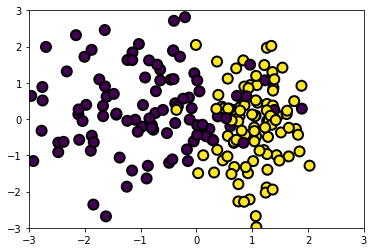

In [74]:
import numpy as np
import matplotlib .pyplot as plt
import cv2
from sklearn.datasets import make_classification
from scipy.spatial import Voronoi, voronoi_plot_2d


# make_classification 이용하여 데이터 생성
X, y = make_classification(n_features=2, n_samples = 200, n_informative=1, n_redundant=0,
                           n_clusters_per_class=1, random_state=3)
                           
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=2)

plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

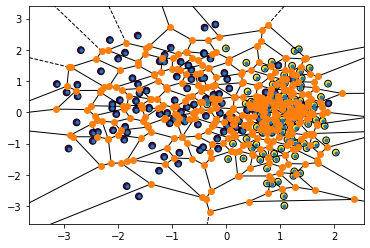

In [75]:
vor = Voronoi(X, qhull_options = 'Qc')

# TODO voronoi_plot_2d  이용 Fig 생성
fig = voronoi_plot_2d(vor)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=45, edgecolor="k", linewidth=1)
# for i in vor.point_region:
    # plt.annotate(str(i), (vor.points[i][0], vor.points[i][1]), size = 12)
plt.show()

In [76]:
# 보로노이 다이어그램의 이웃들을 체크해서 현재 클래스와 같은 클래스만 존재한다면 현재 노드는 제거

# 버릴지 아닐지 마킹할 변수 선언
mark = np.zeros(len(X))

# 현재 지역과 인접한 지역의 인덱스 정보를 모음
# voronoi.ridge_point : 인접한 보로노이의 지역의 인덱스가 저장되어 있음. (idx1, idx2) 의 형태
def get_neighbor_region_idx(curr_idx, voronoi):
    # TODO
    neighbor_pair = []
    for p in voronoi.ridge_points:
      if curr_idx in p:
        if curr_idx==p[0]:
          neighbor_pair.append((curr_idx, p[1]))
        else:
          neighbor_pair.append((curr_idx, p[0]))
    return neighbor_pair

# print(vor.ridge_points)

for i in range(len(X)):
    # 현재 인덱스 지역과 인접한 모든 지역의 정보를 받음
    neighbor_pair = get_neighbor_region_idx(i, vor)     
    
    #print(neighbor_pair)
    # Ex ) 
    # [(0, 26), (0, 191), (0, 3), (0, 160), (0, 180), (0, 123), (0, 59)]
    # [(1, 23), (1, 184), (1, 127), (1, 113), (1, 152), (1, 131)]
    # [(2, 93), (2, 74), (2, 33), (2, 13), (2, 103)]
    # ...


    # 거리 계산
    shortest_dist = 99999999
    shortest_idx = -1
    
    # 인접한 모든 지역의 클래스를 체크함
    isSame = True
    for j in range(len(neighbor_pair)):
        idx1 = neighbor_pair[j][0]
        idx2 = neighbor_pair[j][1]
        
        # 레이블 비교
        if y[idx1]!=y[idx2]: # 만약 레이블이 다르다면 
            isSame = False #나감
            break
                    
    # 모든 인접한 지역이 다 같은 클래스라면 마킹.
    # 마킹해놓고 나중에 한꺼번에 버림
    if isSame == True:
        mark[i] = 1
        
# 새로운 포인트 좌표 배열
new_pt = np.where(mark<1) # 마킹이 안된것을 남김

pt_remain = X[new_pt]
labels_remain = y[new_pt]


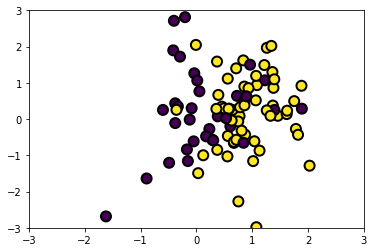

In [77]:
plt.scatter(pt_remain[:, 0], pt_remain[:, 1], marker='o', c=labels_remain,
            s=100, edgecolor="k", linewidth=2)
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.show()

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

test_X, test_y = make_classification(n_features=2, n_samples =30, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=3)
# Editing 전의 데이터로 학습
knn_classifier1 = KNeighborsClassifier(n_neighbors=1)
# TODO classifier 학습, predict
knn_classifier1.fit(pt_remain, labels_remain)
 
y_pred = knn_classifier1.predict(test_X)
print(f'Accuracy:', (accuracy_score(test_y, y_pred)))

# Editing 후의 데이터로 학습
knn_classifier2 = KNeighborsClassifier(n_neighbors=1)
# TODO classifier 학습, predict
knn_classifier2.fit(pt_remain, labels_remain)

print(f'Accuracy:', (accuracy_score(test_y, y_pred)))

Accuracy: 0.7
Accuracy: 0.7
